In [20]:
import matplotlib.pyplot as plt
from Selection import selection
import time
from tqdm import tqdm
import numpy as np
import numpy.random as npr
from scipy.stats import linregress

In [21]:
def benchmark(A: list[int], k: int):
    start = time.perf_counter()
    selection(A, k)
    end = time.perf_counter()
    return end - start

### Selection algorithm runtime

In [40]:
n = [5+1000*x for x in range(101)]
k = 3
times = []
for i in tqdm(n):
    test_list = [(int)(npr.rand() * x) for x in range(1,i)]
    times.append(benchmark(test_list, k))

100%|██████████| 101/101 [00:05<00:00, 16.93it/s]


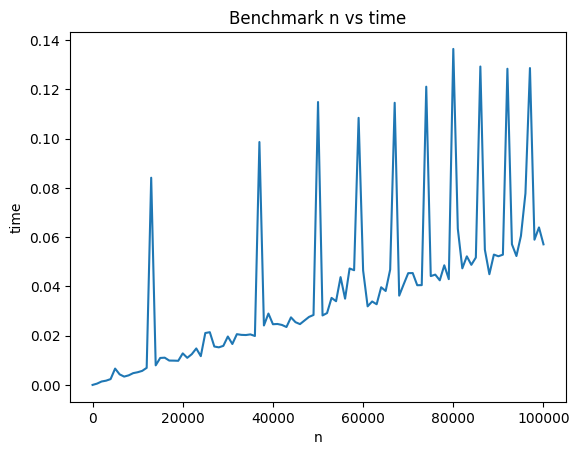

In [41]:
plt.plot(n, times)
plt.xlabel("n")
plt.ylabel("time")
plt.title("Benchmark n vs time")
plt.savefig("100005_n_benchmark.png")
plt.show()

In [43]:
m, _, _, _, _ = linregress(np.log(n), np.log(times))
_, _, r, p, _ = linregress(n, times)
print("m:", m)
print("p:", p)

m: 0.9741836387024632
p: 1.3870105391189663e-15


### Sorting then picking k run time

In [25]:
def selection_sort(A):
    n = len(A)
    for i in range(n):
        min_index = i
        for j in range(i + 1, n):
            if A[j] < A[min_index]:
                min_index = j
        A[i], A[min_index] = A[min_index], A[i]

In [26]:
def sort_k(A: list[int], k: int):
    selection_sort(A)
    return A[k]

In [27]:
def sort_benchmark(A: list[int], k: int):
    start = time.perf_counter()
    sort_k(A, k)
    end = time.perf_counter()
    return end - start

In [28]:
n_sort = [5+1000*x for x in range(30)]
k = 3
times_sort = []
for i in tqdm(n_sort):
    test_list = [x for x in range (i, 0, -1)]
    times_sort.append(sort_benchmark(test_list, k))

100%|██████████| 30/30 [02:43<00:00,  5.45s/it]


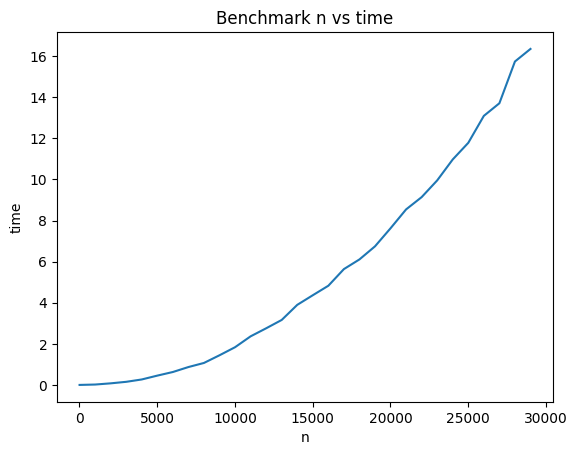

In [37]:
plt.plot(n_sort, times_sort)
plt.xlabel("n")
plt.ylabel("time")
plt.title("Benchmark n vs time")
plt.savefig("29005_n_sort_benchmark.png")
plt.show()

In [38]:
m, _, _, _, _ = linregress(np.log(n_sort), np.log(times_sort))
_, _, r, p, _ = linregress((n_sort), np.sqrt(times_sort))
print("m:", m)
print("r:", r)
print("p:", p)

m: 1.6848129470664706
r: 0.9997139732721253
p: 5.99574536886922e-47
